### Comparing Data to Model

How does varying length of sample affect strain and slope?  How does the data compare to the model?

In [17]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

### Grab Datasets

In [19]:



# 1.7 in length second application
two = os.path.join(path_to_repository , "CSV Data/2_4_2025/second test/*.csv")

# 1.89 in length 
medium = os.path.join(path_to_repository , "CSV Data/12_9_2024/second test/*.csv")

# sample abs_100 -> 8 inch channel length
abs_100 = os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv")

DS_all = [two, medium, abs_100]


# Plot norm data from three different samples and compare to model

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/second test\\Bending_data_abs_1p7_abs_1p7_2nd_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -110.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/second test\\Bending_data_abs_1p7_abs_1p7_2nd_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -110.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/second test\\Bending_data_abs_1p7_abs_1p7_2nd_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -110.0


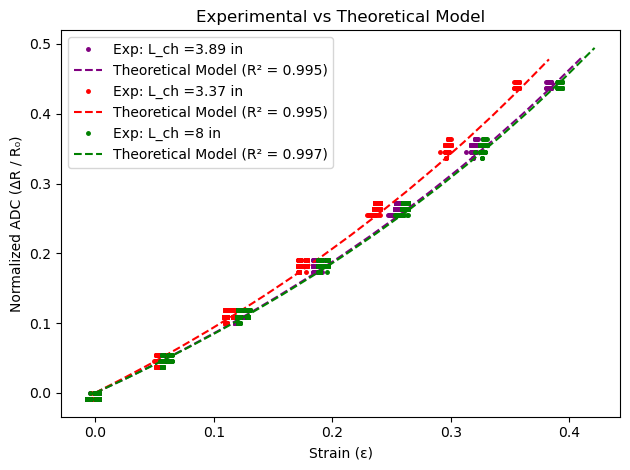

In [3]:
# Import matplotlib to ensure plotting works
import matplotlib.pyplot as plt



# first model and dataset
g = bender_class()
g.load_data(two)
g.normalize_adc_over_R0()

thick = 0.0625 + 0.25 + 0.125
l_ch = 3.89
l_sam = 1.7
area = 0.021 * 0.01375
res = 0.4

# Create a figure and axes before plotting
fig, ax = plt.subplots()  # This explicitly creates the `ax` object

# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='purple', 
                            model_color='purple', data_label='Exp: L_ch =3.89 in', 
                       model_label='Theoretical Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet


# third model and dataset
g = bender_class()
g.load_data(two)
g.normalize_adc_over_R0()

thick = 0.07 + 0.25 + 0.125
l_ch = 3.37
l_sam = 1.86
area = 0.014 * 0.013
res = 0.5

# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='red', 
                            model_color='red', data_label='Exp: L_ch =3.37 in', 
                       model_label='Theoretical Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet



# third model and dataset
g = bender_class()
g.load_data(two)
g.normalize_adc_over_R0()

thick = 0.07 + 0.25 + 0.125
l_ch = 8
l_sam = 1.69
area = 0.02 * 0.02
res = 0.6

# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='green', 
                            model_color='green', data_label='Exp: L_ch =8 in', 
                       model_label='Theoretical Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet



# Show the combined plot
plt.tight_layout()
plt.show()

### 2_4_2025 data 

taking into account optical microscope measurements for channel width!

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/first test\\Bending_data_abs_1p7_abs_1p7_1st_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -96.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/second test\\Bending_data_abs_1p7_abs_1p7_2nd_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -110.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/third test\\Bending_data_abs_1p7_abs_1p7_3rd_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -103.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/fourth test\\Bending_data_abs_1p7_abs_1p7_4th_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -117.0


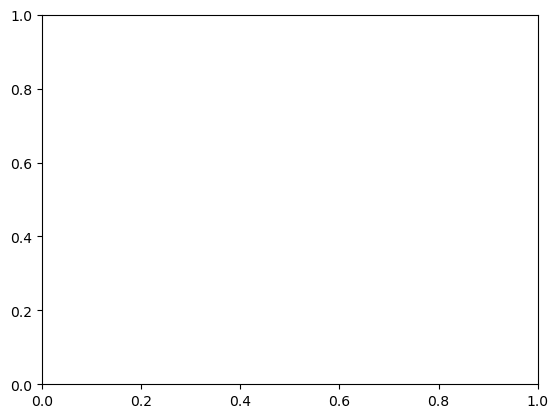

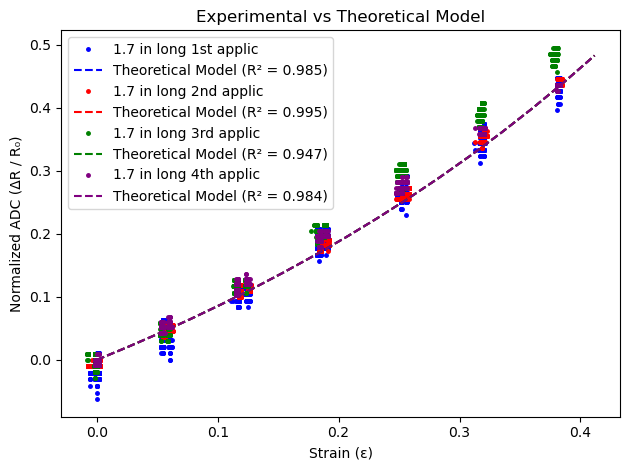

In [4]:
# Import matplotlib to ensure plotting works
import matplotlib.pyplot as plt

# 1.7 in length 1st application
one = os.path.join(path_to_repository , "CSV Data/2_4_2025/first test/*.csv")

# first model and dataset
g = bender_class()
g.load_data(one)
g.normalize_adc_over_R0()

thick = 0.0625 + 0.25 + 0.125
l_ch = 3.89
l_sam = 1.7
area = 0.021 * 0.01375
res = 0.4

# Create a figure and axes before plotting
fig, ax = plt.subplots()  # This explicitly creates the `ax` object
ax = g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='blue', 
                            model_color='blue', data_label='1.7 in long 1st applic', model_label='Theoretical Model', ax=None) # get this info from spreadsheet


# 1.7 in length second application
two = os.path.join(path_to_repository , "CSV Data/2_4_2025/second test/*.csv")

# first model and dataset
g = bender_class()
g.load_data(two)
g.normalize_adc_over_R0()

thick = 0.0625 + 0.25 + 0.125
l_ch = 3.89
l_sam = 1.7
area = 0.021 * 0.01375
res = 0.4

# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='red', 
                            model_color='red', data_label='1.7 in long 2nd applic', model_label='Theoretical Model', ax=ax) # get this info from spreadsheet

# 1.7 in length 3rd application
three = os.path.join(path_to_repository , "CSV Data/2_4_2025/third test/*.csv")

# first model and dataset
g = bender_class()
g.load_data(three)
g.normalize_adc_over_R0()

thick = 0.0625 + 0.25 + 0.125
l_ch = 3.89
l_sam = 1.7
area = 0.021 * 0.01375
res = 0.4

# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='green', 
                            model_color='green', data_label='1.7 in long 3rd applic', model_label='Theoretical Model', ax=ax) # get this info from spreadsheet


# 1.7 in length 4th application
fourth = os.path.join(path_to_repository , "CSV Data/2_4_2025/fourth test/*.csv")

# first model and dataset
g = bender_class()
g.load_data(fourth)
g.normalize_adc_over_R0()

thick = 0.0625 + 0.25 + 0.125
l_ch = 3.89
l_sam = 1.7
area = 0.021 * 0.01375
res = 0.4

# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='purple', 
                            model_color='purple', data_label='1.7 in long 4th applic', model_label='Theoretical Model', ax=ax) # get this info from spreadsheet


# Show the combined plot
plt.tight_layout()
plt.show()

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/second test\\Bending_data_abs_1p7_abs_1p7_2nd_reapply_2_4_25.csv']
ADC normalized with initial value R₀: -110.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized with initial value R₀: -97.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/10_25_2024/voltage divider circuit\\Bending_data_10_25_2024_v1_vd_silicone_glue.csv']
ADC normalized with initial value R₀: 442.0


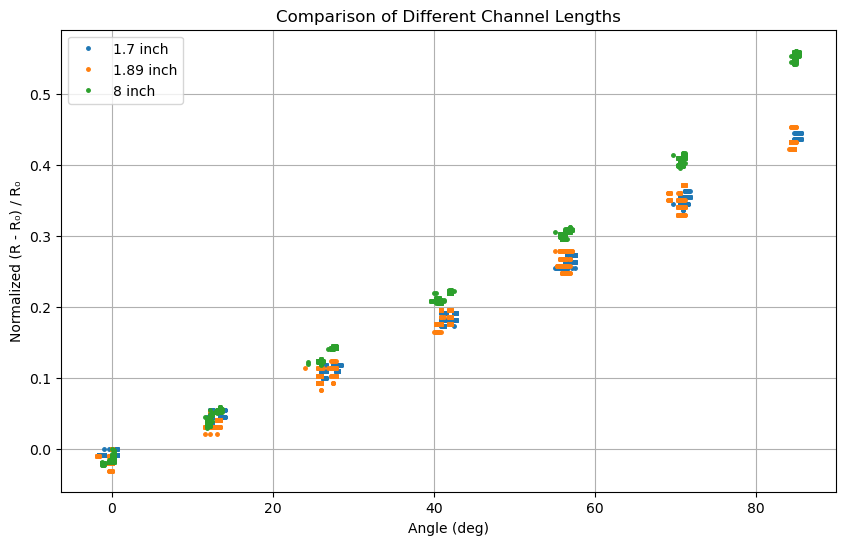

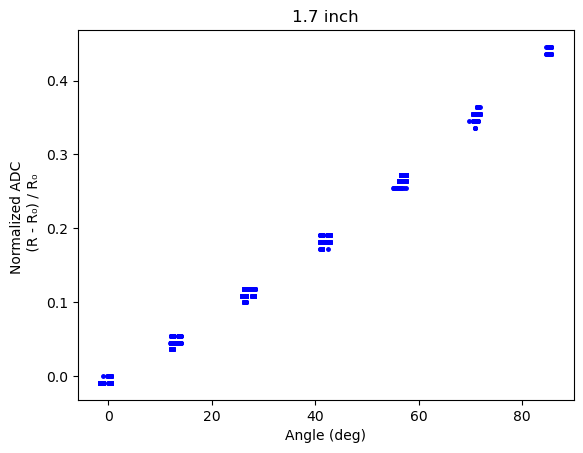

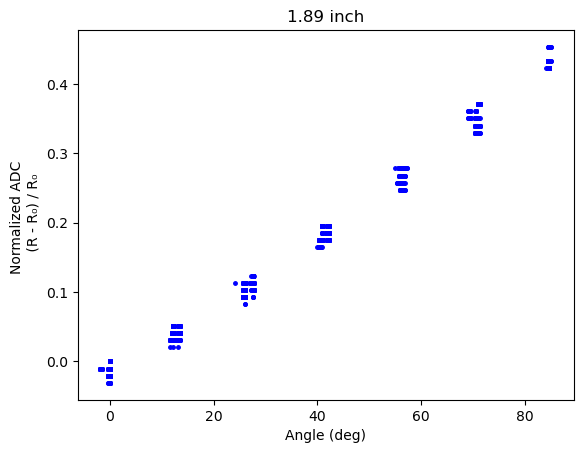

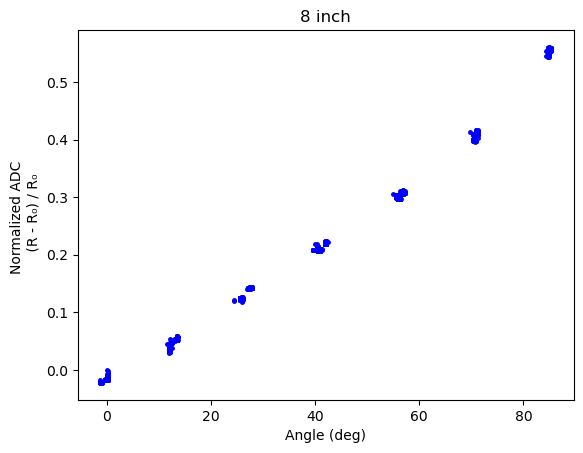

In [35]:
# 1.7 in length second application
two = os.path.join(path_to_repository , "CSV Data/2_4_2025/second test/*.csv")

# 1.89 in length 
medium = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")

# sample abs_100 -> 8 inch channel length
abs_100 = os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv")


DS_all = [("1.7 inch", two), ("1.89 inch", medium), ("8 inch", abs_100)]

# Create a single figure
fig, ax = plt.subplots(figsize=(10, 6))

for label, dataset in DS_all:
    g = bender_class()
    g.load_data(dataset)
    g.normalize_adc_over_R0()

    # Ensure the plot method can use an existing axis
    g.plot_data(scatter=False, title=label)

    # Overlay on the same plot
    ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], '.', markersize=5, label=label)

# Configure plot
ax.set_xlabel("Angle (deg)")
ax.set_ylabel("Normalized (R - R₀) / R₀")
ax.set_title("Comparison of Different Channel Lengths")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()




['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/second test\\Bending_data_abs_1p7_abs_1p7_2nd_reapply_2_4_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/10_25_2024/voltage divider circuit\\Bending_data_10_25_2024_v1_vd_silicone_glue.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0


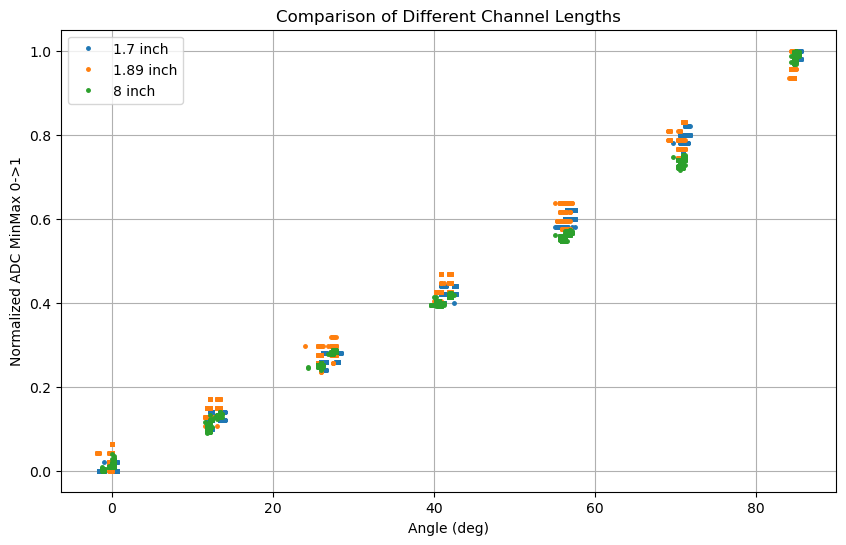

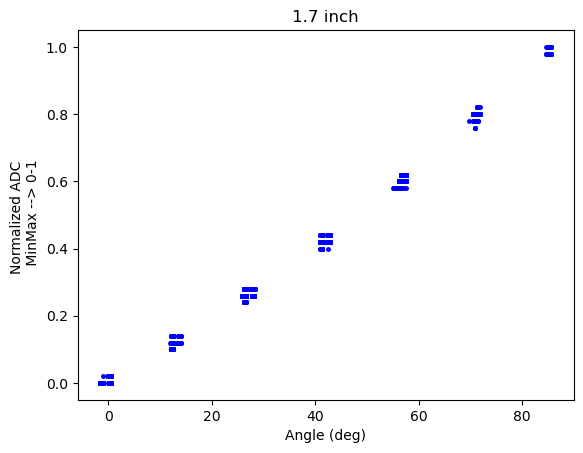

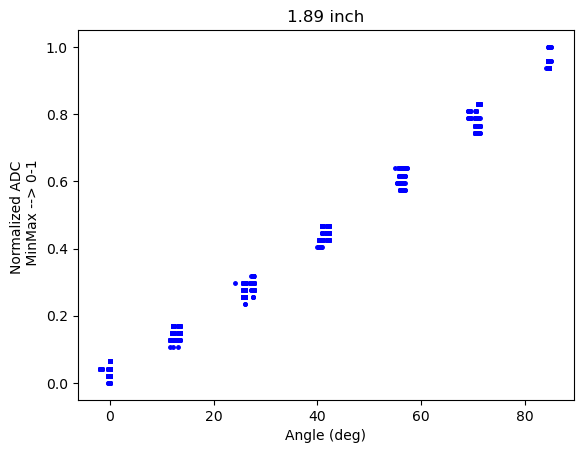

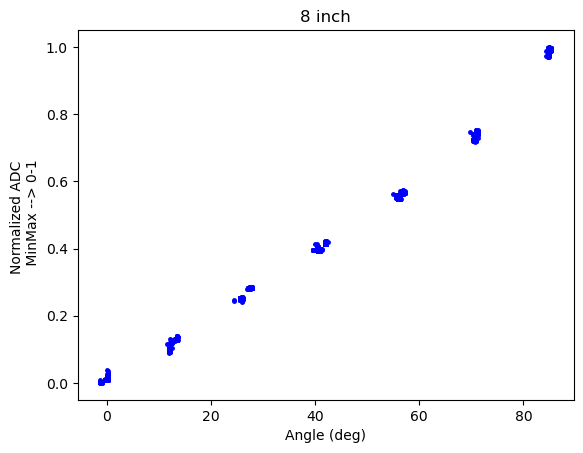

In [37]:
# 1.7 in length second application
two = os.path.join(path_to_repository , "CSV Data/2_4_2025/second test/*.csv")

# 1.89 in length 
medium = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")

# sample abs_100 -> 8 inch channel length
abs_100 = os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv")


DS_all = [("1.7 inch", two), ("1.89 inch", medium), ("8 inch", abs_100)]

# Create a single figure
fig, ax = plt.subplots(figsize=(10, 6))

for label, dataset in DS_all:
    g = bender_class()
    g.load_data(dataset)
    g.normalize_adc_bw_01()

    # Ensure the plot method can use an existing axis
    g.plot_data(scatter=False, title=label)

    # Overlay on the same plot
    ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], '.', markersize=5, label=label)

# Configure plot
ax.set_xlabel("Angle (deg)")
ax.set_ylabel("Normalized ADC MinMax 0->1")
ax.set_title("Comparison of Different Channel Lengths")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


